# Implementação do método de Newton

In [1]:
%matplotlib inline

- Analisar a dependência da estimativa inicial. 
- Executar o código duas vezes: para $x_0=0.0$ e $x_0=1.0$ em $f(x) = -0.9x^2 + 1.7x + 2.5$.

Estimativa inicial: x0 = 0.0

0  -1.470588  -1.946367  4.347059  1.000000e+00
1  -1.022845  -0.180427  3.541121  4.377432e-01
2  -0.971893  -0.002336  3.449407  5.242539e-02
3  -0.971216  -0.000000  3.448188  6.974331e-04
Solução obtida: x = -0.9712156364


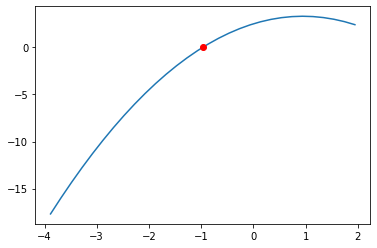

In [2]:
# Método de Newton

from numpy import linspace
from matplotlib.pyplot import plot

def newton(x0,f,df,tol,nmax,var,plotar):

    f = eval('lambda x:' + f)
    df = eval('lambda x:' + df)

    it = 0 # contador de iteracoes

    # imprime estimativa inicial
    print('Estimativa inicial: x0 = {0}\n'.format(x0))  

    # Loop 
    for i in range(0,nmax):
        
        x = x0 - f(x0)/df(x0) # funcao de iteracao 
        
        e = abs(x-x0)/abs(x) # erro
        
        # tabela
        print('{0:d}  {1:f}  {2:f}  {3:f}  {4:e}'.format(i,x,f(x),df(x),e))
        
        if e < tol:
            break
        x0 = x                
        
    if i == nmax:
        print('Solução não obtida em {0:d} iterações'.format(nmax))
    else:
        print('Solução obtida: x = {0:.10f}'.format(x))

    # plotagem
    if plotar:        
        delta = 3*x
        dom = linspace(x-delta,x+delta,30)
        plot(dom,f(dom),x,f(x),'ro')

    return x
      
    
# parametros    
x0 = 0. # estimativa inicial
tol = 1e-3 # tolerancia
nmax = 100 # numero maximo de iteracoes
f = '-0.9*x**2 + 1.7*x + 2.5'   # funcao
df = '-1.8*x + 1.7'   # derivada dafuncao
var = 'x'
plotar = True

# chamada da função
xm = newton(x0,f,df,tol,nmax,var,plotar)


Estimativa inicial: x0 = 1.0

0  34.000000  -980.100000  -59.500000  9.705882e-01
1  17.527731  -244.202079  -29.849916  9.397833e-01
2  9.346734  -60.235844  -15.124121  8.752787e-01
3  5.363967  -14.276187  -7.955141  7.425039e-01
4  3.569381  -2.898486  -4.724886  5.027724e-01
5  2.955930  -0.338690  -3.620674  2.075323e-01
6  2.862387  -0.007875  -3.452297  3.268017e-02
7  2.860106  -0.000005  -3.448190  7.975862e-04
Solução obtida: x = 2.8601057637


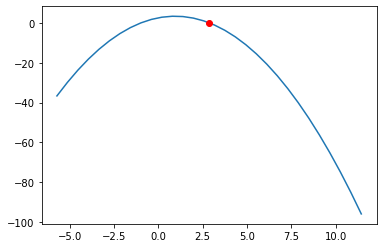

In [3]:
# chamada da função
xm = newton(1.0,f,df,tol,nmax,var,plotar)

## Desafio

1. Generalize o código acima para que a expressão da derivada seja calculada diretamenta e não manualmente. (dica: use computação simbólica)
2. Resolva o problema aplicado abaixo com este método ou desenvolva o seu para resolver e compare com a função residente do `scipy`.

### Problema aplicado

Um jogador de futebol americano está prestes a fazer um lançamento para outro jogador de seu time. O lançador tem uma altura de 1,82 m e o outro jogador está afastado de 18,2 m. A expressão que descreve o movimento da bola é a familiar equação da física que descreve o movimento de um projétil:

$$y = x\tan(\theta) - \dfrac{1}{2}\dfrac{x^2 g}{v_0^2}\dfrac{1}{\cos^2(\theta)} + h,$$

onde $x$ e $y$ são as distâncias horizontal e verical, respectivamente, $g=9,8 \, m/s^2$ é a aceleração da gravidade, $v_0$ é a velocidade inicial da bola quando deixa a mão do lançador e $\theta$ é o Ângulo que a bola faz com o eixo horizontal nesse mesmo instante. Para $v_0 = 15,2 \, m/s$, $x = 18,2 \, m$, $h = 1,82 \, m$ e $y = 2,1 \, m$, determine o ângulo $\theta$ no qual o jogador deve lançar a bola. 

### Solução por função residente

- Importar módulos
- Definir função $f(\theta)$

In [4]:
from scipy.optimize import newton 
import numpy as np
import matplotlib.pyplot as plt

v0 = 15.2
x = 18.2
h = 1.82
y = 2.1
g = 9.8

# f(theta) = 0
f = lambda theta: x*np.tan(theta) - 0.5*(x**2*g/v0**2)*(1/(np.cos(theta)**2)) + h - y

## Localização 

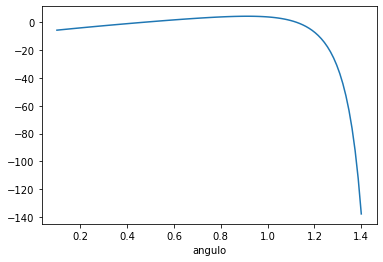

In [5]:
th = np.linspace(0.1,1.4,100,True)
plt.plot(th,f(th))
plt.xlabel('angulo');

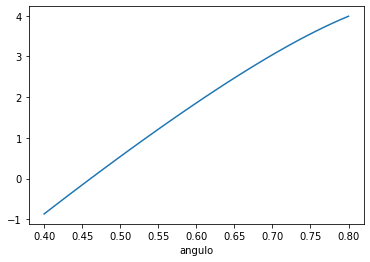

In [6]:
th = np.linspace(0.4,0.8,100,True)
plt.plot(th,f(th))
plt.xlabel('angulo');

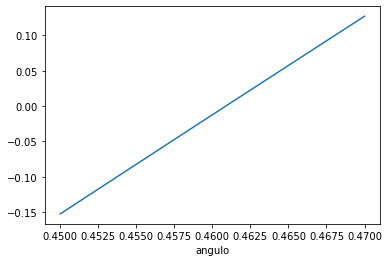

In [7]:
th = np.linspace(0.45,0.47,100,True)
plt.plot(th,f(th))
plt.xlabel('angulo');

## Refinamento

Para a função residente, nem é preciso fazer um processo de localização prolongado de modo a entrar com uma estimativa inicial muito próxima. Plotar a função até um intervalo razoável já é suficiente para ter uma noção sobre onde a raiz está. 

Quanto à escolha da estimativa inicial, ainda que seja "mal feita", o método poderá encontrar a raiz de modo rápido, pois sua programação é robusta. 

Vejamos então, qual é a raiz com uma estimativa inicial de 0.47.

In [8]:
ang = newton(f,0.47)
ang

0.4608834641642987

In [9]:
np.rad2deg(ang)

26.406677343983237